In [17]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../')
import time
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2
from marcia import Sampler,Likelihood
from marcia import Data
from marcia import Cosmology as cosmo 

In [14]:
Samp = Sampler('LCDM',['H0','Omega_m'],['Pantheon_plus'],[70,0.25],sampler_file='Pantheon_LCDM.h5',resume=False,max_n=1000)

Removed no burn in
Best-fit values: [75.05305832  0.33153675]
Max-Likelihood value (including prior likelihood):-701.4612684381235


array([75.05305832,  0.33153675])

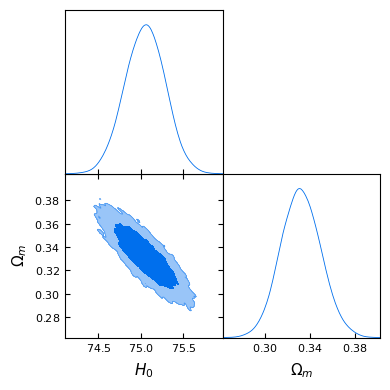

In [18]:
Samp.corner_plot(True)
Samp.MLE()

In [17]:
data =[ 'Pantheon_plus']
db = Data(data)

cmb_z, mb, covariance = db.get_pantheon_plus()
helio_z = db.get_pantheon_plus(Zhel=True)

plt.plot(cmb_z,mb,'o')

Best-fit values: [75.0530695   0.33153695]
Max-Likelihood value (including prior likelihood):-701.4612684650086


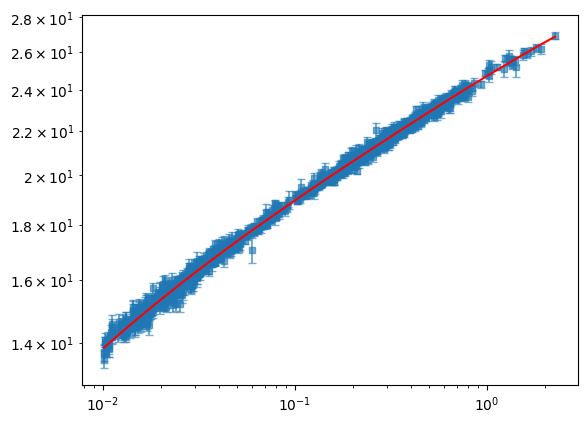

In [46]:
plt.xscale('log')
plt.yscale('log')
plt.errorbar(cmb_z,mb,yerr=np.sqrt(np.diag(covariance)),  markersize=5, alpha=0.6, capsize=3, fmt = 's')
plt.plot(cmb_z, Samp.likelihood.theory.distance_modulus(Samp.MLE(verbose=True),cmb_z, helio_z), 'r-', zorder = 10)
plt.show()

In [23]:
%matplotlib inline